## TASK 2

## LINEAR REGRESSION TO PREDICT STUDENT SCORES

## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing data through URL address

In [2]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
student = pd.read_csv(url)
print("Data imported succesfully.")

Data imported succesfully.


In [3]:
student.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Plotting our data

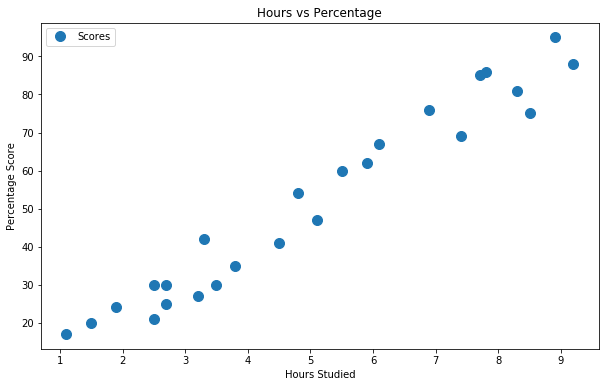

In [4]:
%matplotlib inline
student.plot(x='Hours',y="Scores",style="o",figsize=(10,6),markersize=10)
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

## Preparing the data: Separating features and labels

In [5]:
X = student.iloc[:,:1]
y = student.iloc[:,1:]

## Train-Test splitting

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

## Training the algorithm

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

print("Training Complete")

Training Complete


## Plotting the regression line

<Figure size 648x432 with 0 Axes>

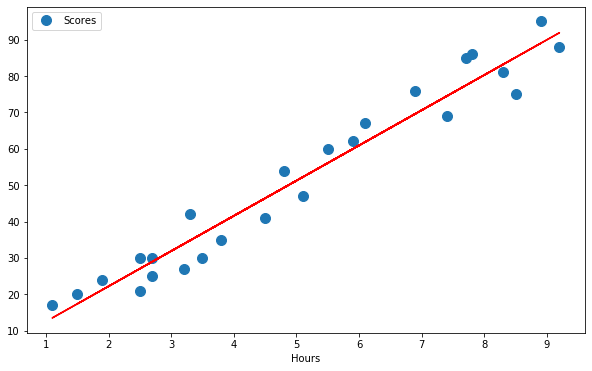

In [8]:
line = model.coef_*X + model.intercept_

plt.figure(figsize=(9,6))
student.plot(x='Hours',y="Scores",style="o",figsize=(10,6),markersize=10)
plt.plot(X,line,c='r')
plt.show()

## Making Predictions

In [9]:
print(X_test)
y_pred = model.predict(X_test)

    Hours
8     8.3
16    2.5
0     2.5
23    6.9
11    5.9


In [10]:
y_test.columns=["Actual"]
y_test.index=(np.arange(5))

In [11]:
y_predict = pd.DataFrame(data=y_pred,columns=["Predicted"])

## Comparing actual and predicted data

In [12]:
comp=pd.concat([y_test,y_predict],axis=1)
comp

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


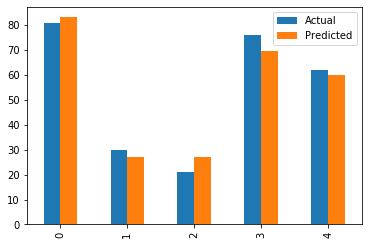

In [13]:
comp.plot.bar()

## Scores for studying 9.25 hrs?

In [14]:
hours = [[9.25]]
score_pred = model.predict(hours)
print(f"Number of hours:{hours[0][0]}")
print(f"Marks scored : {score_pred[0][0]}")

Number of hours:9.25
Marks scored : 92.38611528261494


## Evaluating the model

In [15]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: ",mean_absolute_error(y_test,y_predict))

Mean Absolute Error:  3.9207511902099244
